Purpose:
- build the cell-cell graph
- embed cells in 2D (UMAP)
- identify clusters (Leiden)
- Save a resusable, clustered object

Load data & Libraries

In [4]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = sc.read(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\raw\figshare\adata_pca.h5ad")

Sanity check

In [5]:
adata

AnnData object with n_obs × n_vars = 178971 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Percent_mt', 'Patient', 'Gender', 'Subtype', 'Stage', 'seurat_clusters', 'Study', 'Cell_Cluster_level1', 'Cell_Cluster_level2', 'validation_original_annotation', 'id', 'predicted.celltypel1.score', 'predicted.celltypel1', 'predicted.celltypel2.score', 'predicted.celltypel2'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'X_name', 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

Construct the neighborhood graph
**Conceptually**
- each cell becomes a node
- edges connect transcriptionally similar cells
- UMAP and clustering are both derived from this graph

In [6]:
sc.pp.neighbors(
    adata,
    n_neighbors=15,
    n_pcs=25
)

c:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


n_neighbors=15:
- local neighborhood size
- controls how 'local' structure is perserved
n_pcs=25:
- Uses the first 25 PCs
- Filters noise before graph construction

Compute UMAP embedding
**UMAP**
- perserves local neighborhoods
- projects high-dimensional graph -> 2D
- visualization only (not used for clustering)

In [7]:
sc.tl.umap(adata)

Initial UMAP visualization
- see overall structure
- identify obvious batch effects
- check if data looks biologically plausible

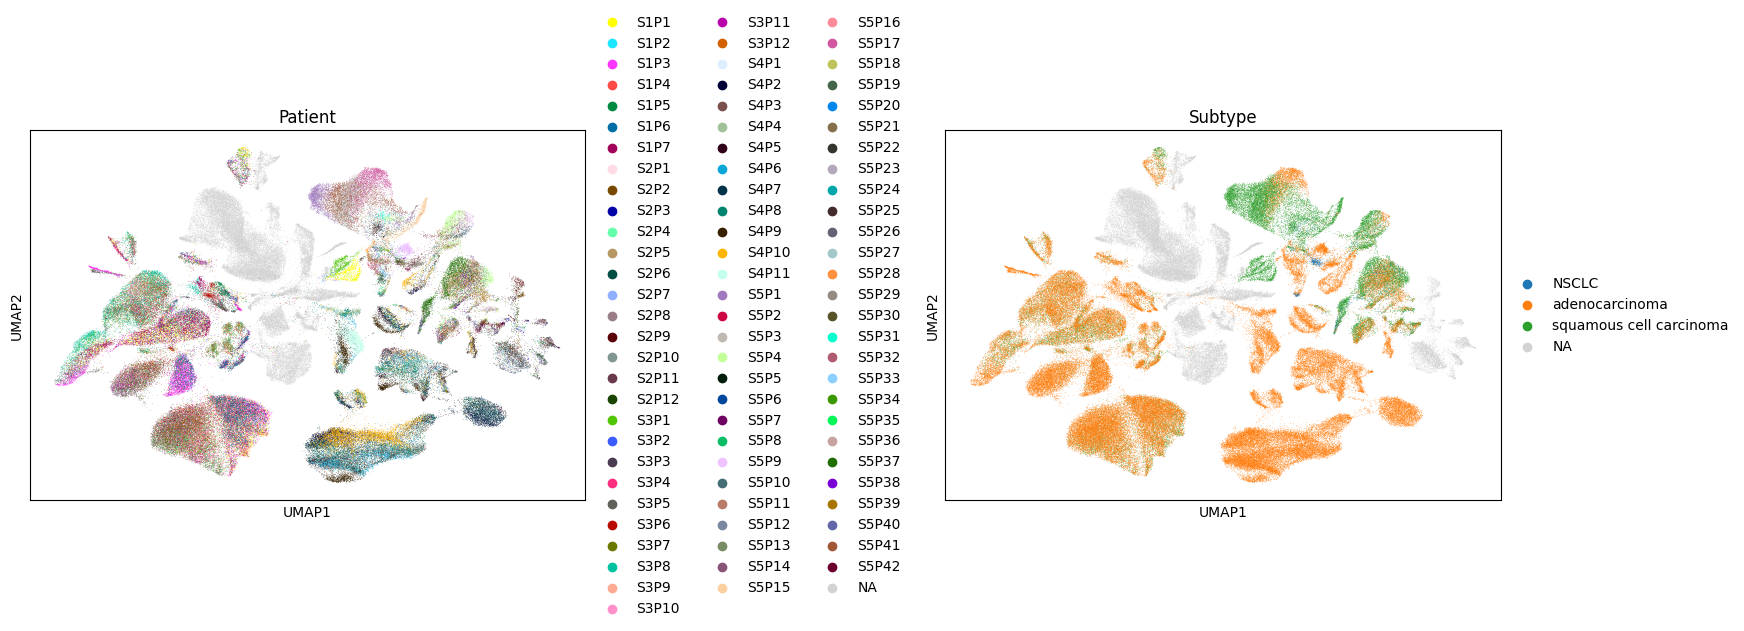

In [11]:
sc.pl.umap(
    adata,
    color=["Patient", "Subtype"],
    wspace=0.5,
)